# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ashwa\Downloads\new_insurance_data (2).csv")


In [3]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
df.shape

(1338, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [9]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [24]:
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1.287000e+03,1287.000000
mean,39.419580,30.655746,1.094794,33498.578933,15.247086,9.113778e+05,1.579929e+07,1.068376,3.727972e+08,13366.072420
std,14.051987,6.086323,1.202782,15611.720348,7.457366,9.083364e+04,2.653821e+07,0.529079,5.655770e+08,12025.821700
min,18.000000,15.960000,0.000000,2912.590584,1.000000,6.991570e+05,2.945253e+04,0.000000,3.150786e+06,1121.873900
25%,27.000000,26.220000,0.000000,20905.974820,9.000000,8.489270e+05,4.114357e+06,1.000000,7.964523e+07,4842.251225
50%,40.000000,30.360000,1.000000,33968.774160,15.000000,9.152840e+05,7.567064e+06,1.000000,1.451129e+08,9549.565100
75%,51.000000,34.600000,2.000000,45152.414195,20.000000,9.726140e+05,1.093014e+07,1.000000,3.337660e+08,16964.132700
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [14]:
col=list(df.columns)
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

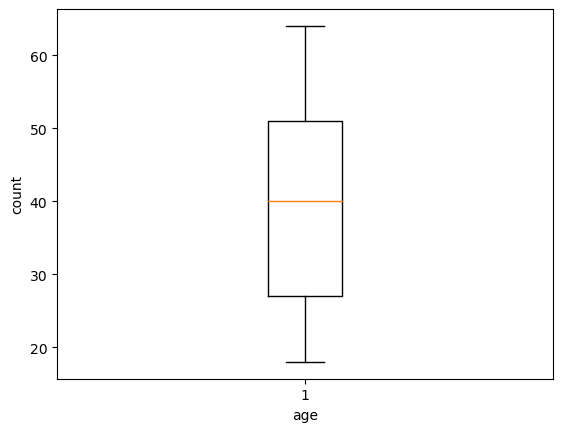

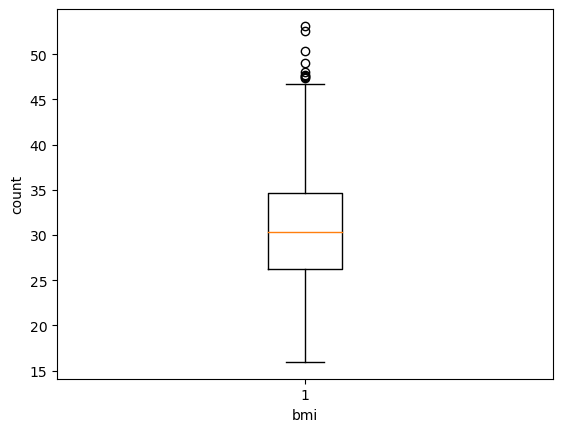

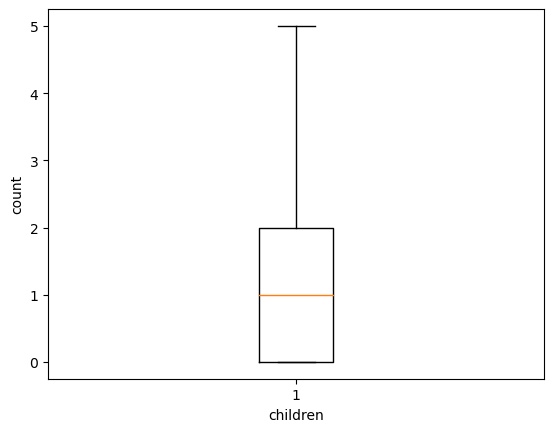

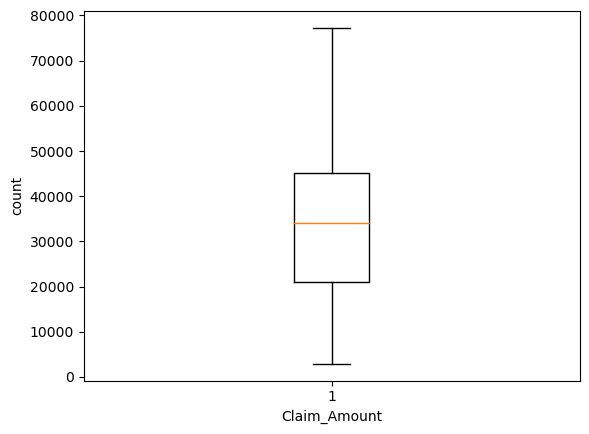

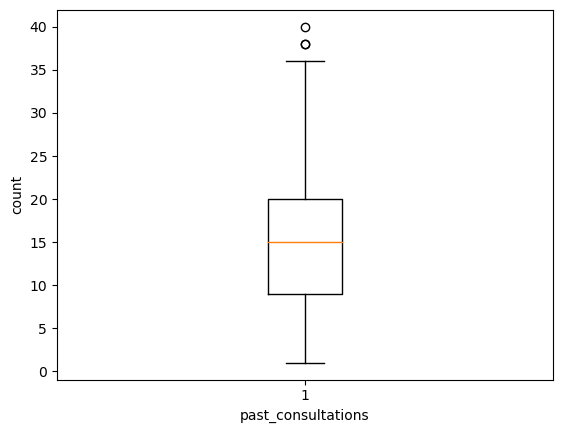

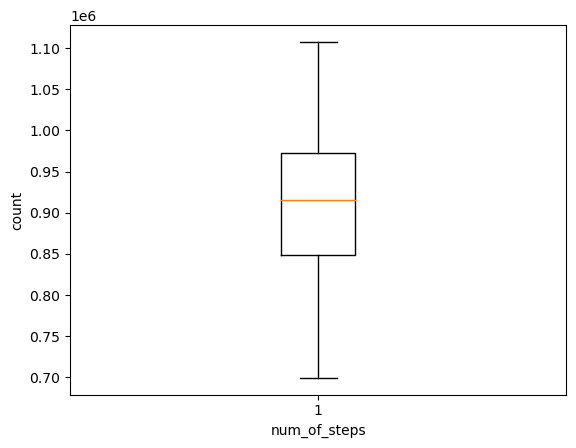

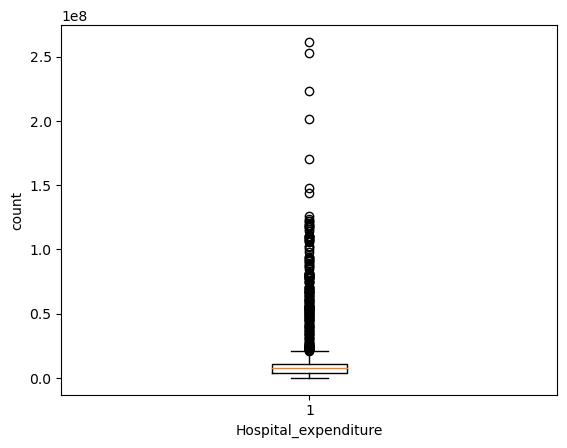

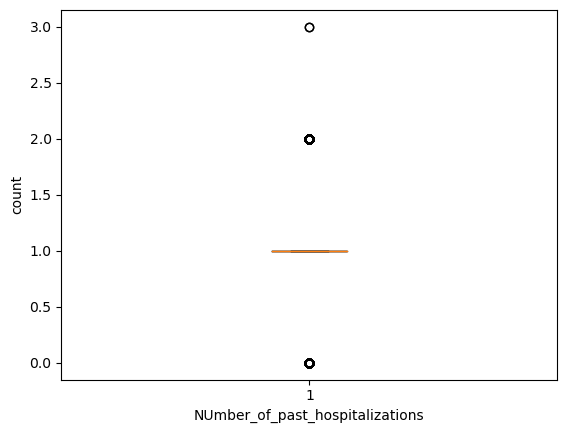

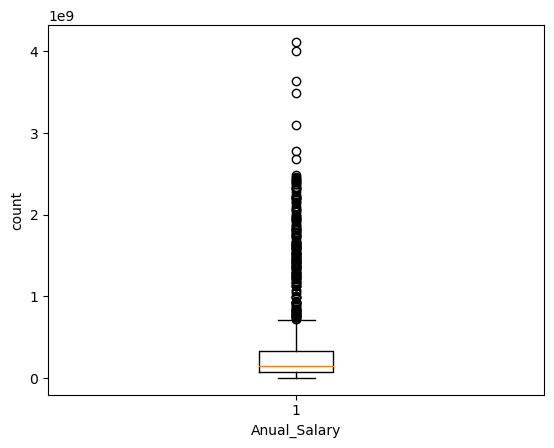

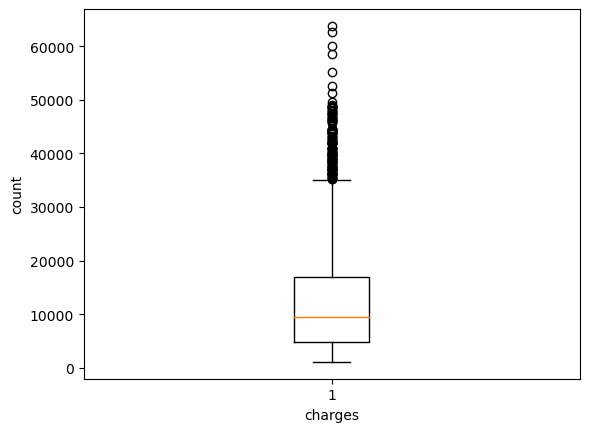

In [15]:
for col_name in col:
    if(df[col_name].dtypes !="object"):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [20]:
#bmi, past_consultations,hospital_expenditure,number_of_past_hospitalizations,annal_salary
Q1=df.bmi.quantile(0.25)
Q2=df.bmi.quantile(0.50)
Q3=df.bmi.quantile(0.75)


In [21]:
Q1


26.22

In [22]:
Q2

30.36

In [23]:
Q3

34.6

In [25]:
IQR=Q3-Q1

In [26]:
IQR

8.380000000000003

In [27]:
df = df[(df.bmi >= Q1 -1.5*IQR) & (df.bmi <= Q3 + 1.5*IQR) ]

In [28]:
Q1 = df.past_consultations.quantile(0.25)
Q3 = df.past_consultations.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.past_consultations >= Q1 -1.5*IQR) & (df.past_consultations <= Q3 + 1.5*IQR) ]

Q1 = df.Hospital_expenditure.quantile(0.25)
Q3 = df.Hospital_expenditure.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Hospital_expenditure >= Q1 -1.5*IQR) & (df.Hospital_expenditure <= Q3 + 1.5*IQR) ]

Q1 = df.NUmber_of_past_hospitalizations.quantile(0.25)
Q3 = df.NUmber_of_past_hospitalizations.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.NUmber_of_past_hospitalizations >= Q1 -1.5*IQR) & (df.NUmber_of_past_hospitalizations <= Q3 + 1.5*IQR) ]

Q1 = df.Anual_Salary.quantile(0.25)
Q3 = df.Anual_Salary.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Anual_Salary >= Q1 -1.5*IQR) & (df.Anual_Salary <= Q3 + 1.5*IQR) ]

In [29]:

#out=['bmi','past_consultations', 'Hospital_expenditure','NUmber_of_past_hospitalizations','Anual_Salary']

In [30]:
#for i in out:
#    Q1 = df.i.quantile(0.25)
#    Q3 = df.i.quantile(0.75)
#    IQR = Q3 - Q1
#    df = df[(df.i >= Q1 -1.5*IQR) & (df.i <= Q3 + 1.5*IQR) ]

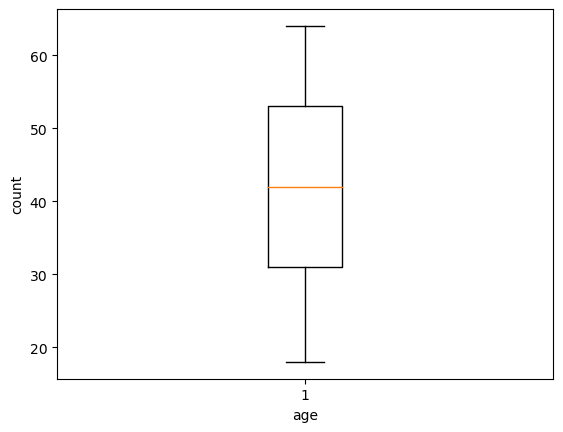

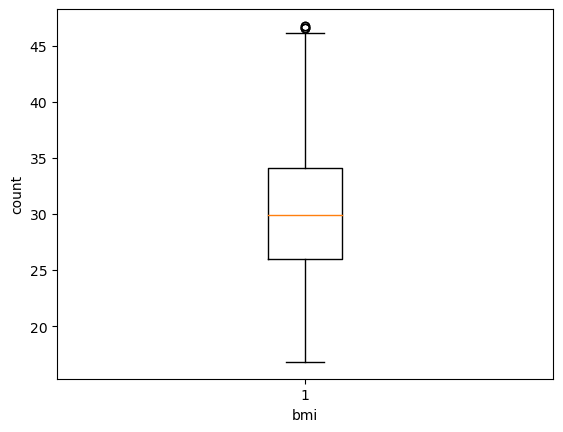

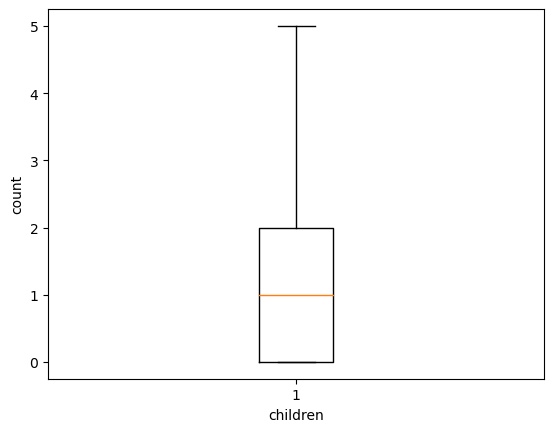

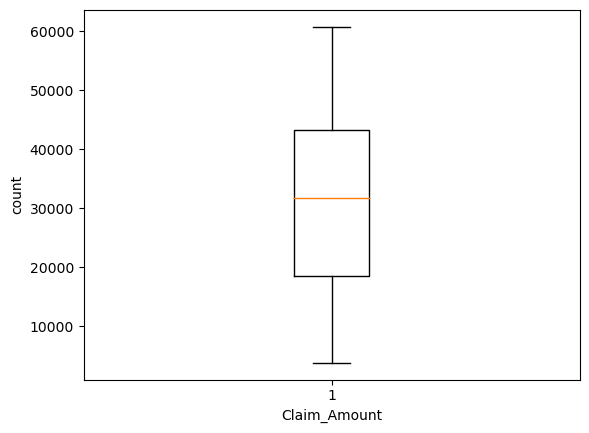

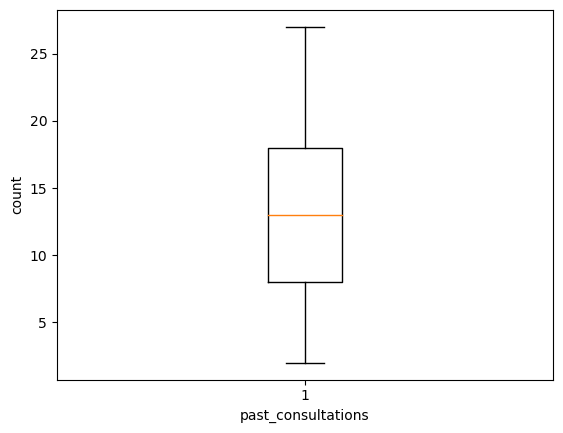

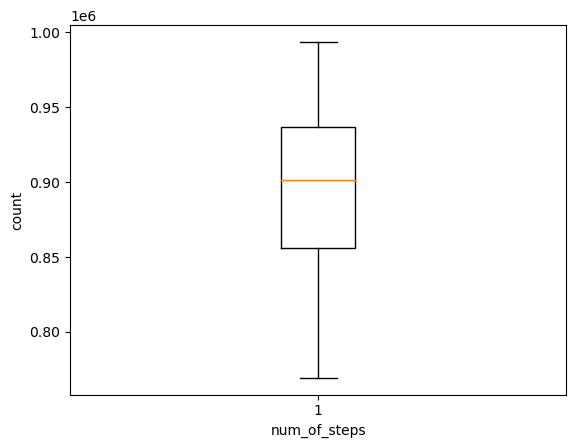

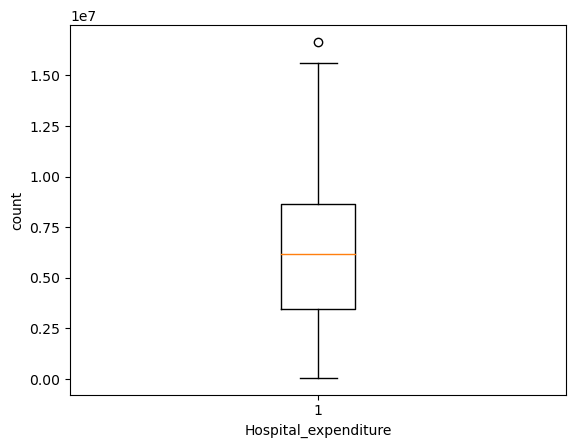

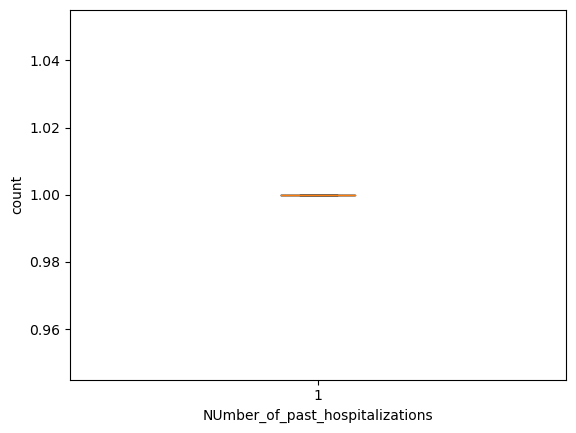

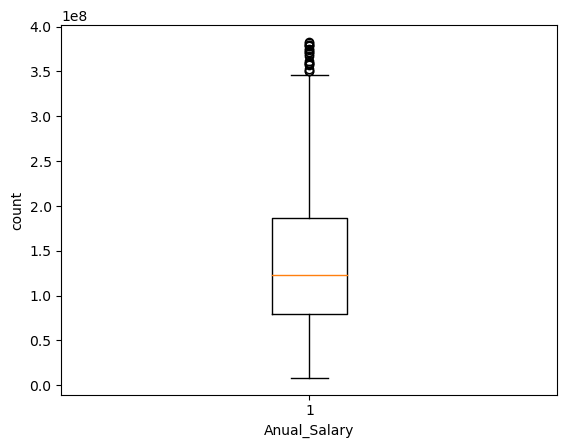

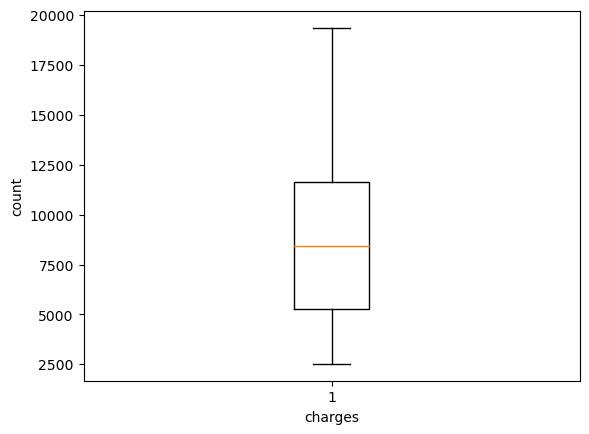

In [31]:
for col_name in col:
    if(df[col_name].dtypes !="object"):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [32]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,male,27.550,0.0,no,39148.95495,10.0,780652.0,8.614147e+06,1.0,54526009.33,northwest,2523.16950
152,22.0,female,20.235,0.0,no,41547.52536,13.0,802627.0,2.491594e+05,1.0,16718473.13,northwest,2527.81865
153,25.0,male,35.625,0.0,no,39660.60193,12.0,770773.0,3.043323e+06,1.0,48526941.68,northwest,2534.39375
154,20.0,male,31.130,2.0,no,16032.87148,7.0,769255.0,1.599069e+06,1.0,24412621.85,southeast,2566.47070
155,21.0,female,17.400,1.0,no,31090.98977,21.0,778769.0,3.015365e+06,1.0,58535788.80,southwest,2585.26900


# Feature Selection

# VIF- Variance Inflation Factor

In [33]:
# VIF --> Variance Inflation Factor
# VIF = 1 --> Variables are not correlated
# VIF (1-6) --> Variables are moderately correlated --> Acceptable
# VIF >6 --> vARIABLES ARE HIGHLY CORRELATED (Drop those vcolumns)

In [35]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [36]:
X

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
151,25.0,27.550,0.0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07
152,22.0,20.235,0.0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07
153,25.0,35.625,0.0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07
154,20.0,31.130,2.0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07
155,21.0,17.400,1.0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07
...,...,...,...,...,...,...,...,...,...
1036,43.0,20.130,2.0,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08
1041,24.0,27.600,0.0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)
        
X = df[col_list]

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                           feature          VIF
0                              age     2.244063
1                              bmi     1.050993
2                         children     1.077404
3                     Claim_Amount     1.040690
4               past_consultations     1.080557
5                     num_of_steps     5.999974
6             Hospital_expenditure     1.182321
7  NUmber_of_past_hospitalizations  1405.296038
8                     Anual_Salary     4.006099


In [37]:
X.values

array([[2.50000000e+01, 2.75500000e+01, 0.00000000e+00, ...,
        8.61414747e+06, 1.00000000e+00, 5.45260093e+07],
       [2.20000000e+01, 2.02350000e+01, 0.00000000e+00, ...,
        2.49159425e+05, 1.00000000e+00, 1.67184731e+07],
       [2.50000000e+01, 3.56250000e+01, 0.00000000e+00, ...,
        3.04332279e+06, 1.00000000e+00, 4.85269417e+07],
       ...,
       [2.90000000e+01, 2.79400000e+01, 1.00000000e+00, ...,
        1.66598217e+07, 1.00000000e+00, 3.71218761e+08],
       [3.10000000e+01, 2.59000000e+01, 3.00000000e+00, ...,
        1.36193781e+07, 1.00000000e+00, 3.81289535e+08],
       [3.10000000e+01, 2.98100000e+01, 0.00000000e+00, ...,
        1.02899068e+07, 1.00000000e+00, 3.74530951e+08]])

In [38]:
for i in range(len(X.columns)):
    print(i)

0
1
2
3
4
5
6
7
8


In [40]:
df.values

array([[25.0, 'male', 27.55, ..., 54526009.33, 'northwest', 2523.1695],
       [22.0, 'female', 20.235, ..., 16718473.13, 'northwest',
        2527.81865],
       [25.0, 'male', 35.625, ..., 48526941.68, 'northwest', 2534.39375],
       ...,
       [29.0, 'female', 27.94, ..., 371218761.2, 'southeast', 19107.7796],
       [31.0, 'male', 25.9, ..., 381289534.6, 'southwest', 19199.944],
       [31.0, 'male', 29.81, ..., 374530950.6, 'southeast', 19350.3689]],
      dtype=object)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)
        
X = df[col_list]

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                           feature          VIF
0                              age     2.244063
1                              bmi     1.050993
2                         children     1.077404
3                     Claim_Amount     1.040690
4               past_consultations     1.080557
5                     num_of_steps     5.999974
6             Hospital_expenditure     1.182321
7  NUmber_of_past_hospitalizations  1405.296038
8                     Anual_Salary     4.006099


In [42]:
df = df.drop(['NUmber_of_past_hospitalizations'],axis = 1)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)
        
X = df[col_list]

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                feature        VIF
0                   age  16.334839
1                   bmi  26.966942
2              children   2.055611
3          Claim_Amount   5.813854
4    past_consultations   6.417597
5          num_of_steps  58.693809
6  Hospital_expenditure   5.524176
7          Anual_Salary   6.183456


In [45]:
df = df.drop(['num_of_steps'],axis = 1)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)
        
X = df[col_list]

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                feature        VIF
0                   age  13.463550
1                   bmi  14.548677
2              children   1.945699
3          Claim_Amount   5.267436
4    past_consultations   5.911489
5  Hospital_expenditure   5.218410
6          Anual_Salary   5.990854


In [47]:
df = df.drop(['bmi'],axis = 1)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)
        
X = df[col_list]

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                feature       VIF
0                   age  8.739225
1              children  1.827241
2          Claim_Amount  4.846444
3    past_consultations  5.589741
4  Hospital_expenditure  4.889264
5          Anual_Salary  5.841066


In [49]:
df = df.drop(['age'],axis = 1)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)
        
X = df[col_list]

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                feature       VIF
0              children  1.816913
1          Claim_Amount  4.264550
2    past_consultations  4.927842
3  Hospital_expenditure  4.672553
4          Anual_Salary  5.107190


In [51]:
x= df.loc[:,["children","Claim_Amount","past_consultations","Hospital_expenditure","Anual_Salary"]]
y=df.loc[:,['charges']]

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 23)

In [55]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [56]:
y_pred=l_model.predict(x_test)

In [57]:
from sklearn.metrics import r2_score


In [60]:
accuracy=r2_score(y_test,y_pred)
accuracy*100

85.99589566833761